In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

# Datasets


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


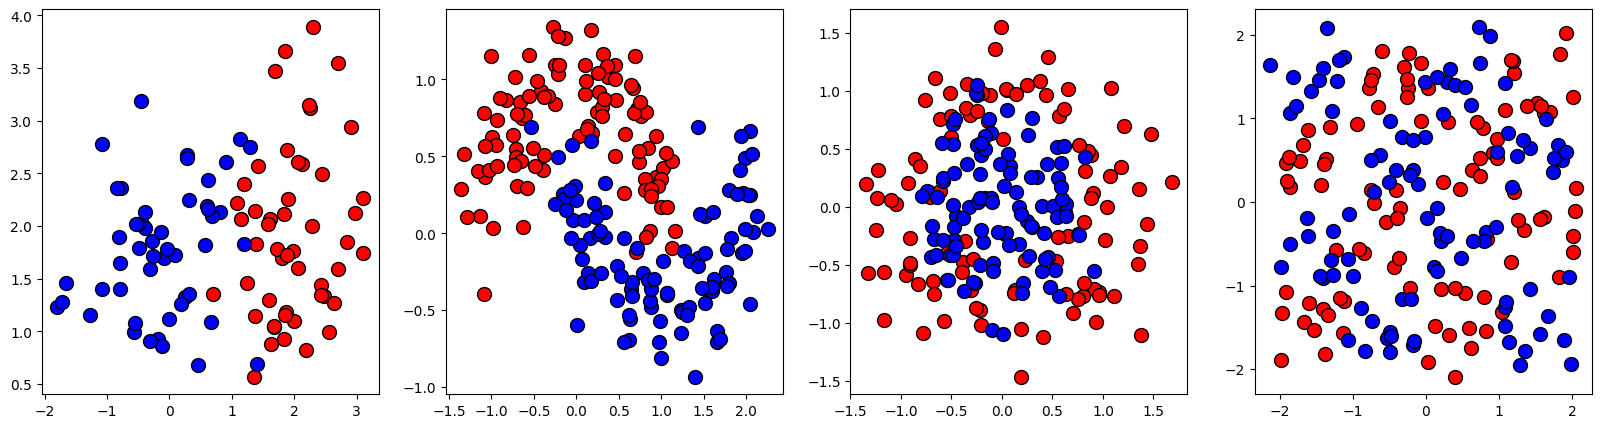

In [2]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [3]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

**Question 1**

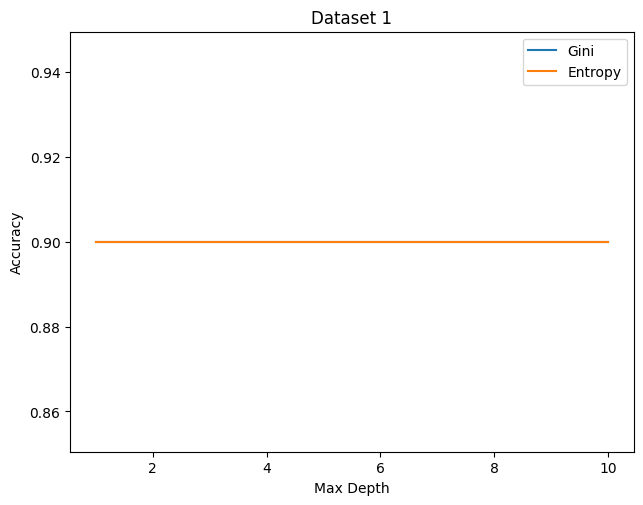

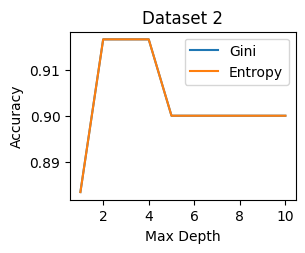

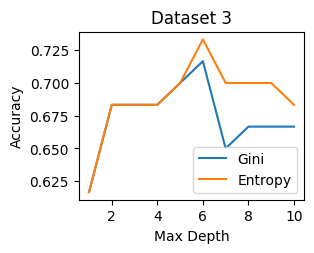

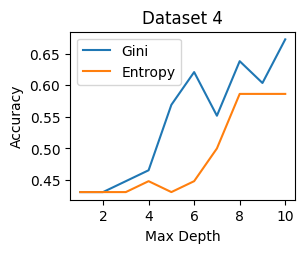

In [51]:

            ######################
            ### Your code here ### 
            ######################



max_depth_range = range(1,11)


plt.figure(figsize=(16, 12))
#let's do this over all four datasets

best_max_depth_gini = [] # best max_depth for each dataset
best_max_depth_entropy = []
best_gini_tree = []
best_entropy_tree = []

for i in range(len(datasets)):
    dataset = datasets[i]
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    gini_scores = []
    entropy_scores = []

    for max_depth in max_depth_range:
         # Decision Tree with Gini
        clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
        clf_gini.fit(X_train, y_train)
        y_pred_gini = clf_gini.predict(X_test)

        #score
        gini_score = sum(y_pred_gini == y_test) / len(y_test)
        gini_scores.append(gini_score)

       

      
        
        # Decision Tree with Entropy
        clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
        clf_entropy.fit(X_train, y_train)
        y_pred_entropy = clf_entropy.predict(X_test)
        entropy_score = sum(y_pred_entropy== y_test) / len(y_test)
        entropy_scores.append(entropy_score)
    
    #best max_depth for each dataset
    
    best_max_depth_gini.append(int(np.argmax(gini_scores) + 1))
    best_max_depth_entropy.append(int(np.argmax(entropy_scores) + 1))

    #best tree for each dataset
    best_gini_tree.append(DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth_gini[i]))
    best_entropy_tree.append(DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth_entropy[i]))
    
    # Plot scores 

    plt.subplot(2, 2, i + 1)
    plt.plot(max_depth_range, gini_scores, label='Gini')
    plt.plot(max_depth_range, entropy_scores, label='Entropy')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Dataset {i+1}')
    plt.legend()

    plt.show()








**Question 2**

best max_depth for dataset 1 with Gini criterion: 1


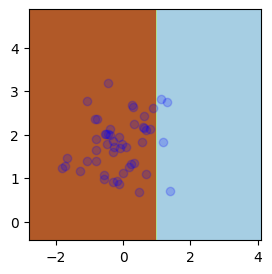

best max_depth for dataset 1 with Entropy criterion: 1


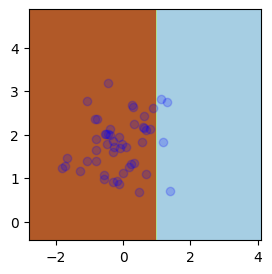

best max_depth for dataset 2 with Gini criterion: 2


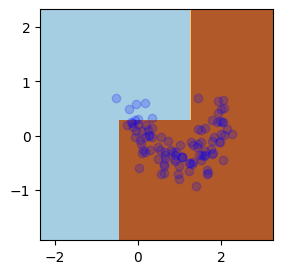

best max_depth for dataset 2 with Entropy criterion: 2


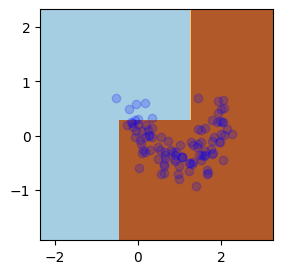

best max_depth for dataset 3 with Gini criterion: 6


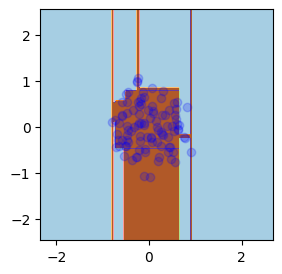

best max_depth for dataset 3 with Entropy criterion: 6


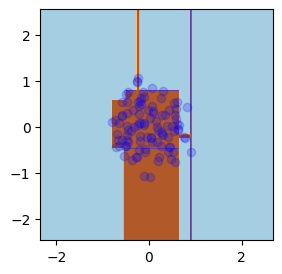

best max_depth for dataset 4 with Gini criterion: 10


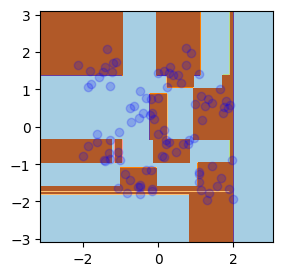

best max_depth for dataset 4 with Entropy criterion: 8


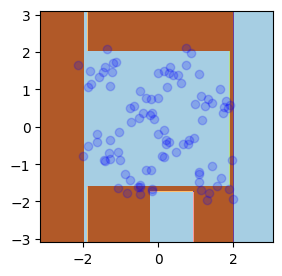

In [52]:
#Let's plot the best tree for each data set

for i in range(len(datasets)):
    dataset = datasets[i]
    X, y = dataset
    best_gini_tree[i].fit(X, y)
    print(f'best max_depth for dataset {i+1} with Gini criterion: {best_max_depth_gini[i]}')
    plot_tree(best_gini_tree[i], X, y)

    best_entropy_tree[i].fit(X, y)
    print(f'best max_depth for dataset {i+1} with Entropy criterion: {best_max_depth_entropy[i]}')
    plot_tree(best_entropy_tree[i], X, y)
    
    

**Question 3**

decision frontier for the best tree


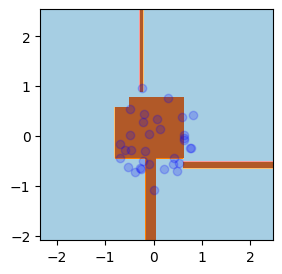

decision frontier for the random forest


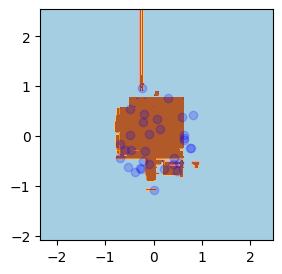

<Figure size 640x480 with 0 Axes>

In [53]:
from sklearn.ensemble import RandomForestClassifier

dataset = datasets[2]  
X, y = dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# best impurity measure
best_impurity_measure = 'gini' if best_max_depth_gini[2] > best_max_depth_entropy[2] else 'entropy'
best_max_depth = best_max_depth_gini[2] if best_impurity_measure == 'gini' else best_max_depth_entropy[2]


best_tree = DecisionTreeClassifier(criterion=best_impurity_measure, max_depth=best_max_depth, random_state=42)
best_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


print("decision frontier for the best tree")
plot_tree(best_tree, X_test, y_test)
print("decision frontier for the random forest")
plot_tree(random_forest, X_test, y_test)
plt.tight_layout()

Decision boundaries with  random forests are better than with the best tree obtained. Indeed more data from the blue class is correctly classified with random forests, even if the data was "far" from the rest of the class or a little bit overlapping with the red class. This is especially visible with the points at the bottom right of the blue class.

Decision boundaries with random forests are overall more precise.

# Ensembles
## Exercise 4, random forest

In [27]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
            ######################
            ### Your code here ### 
            ######################
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
scores_diabetes = cross_val_score(regressor, X_diabetes, y_diabetes, cv=5, scoring='r2')
print(f'Diabetes dataset R2 scores: {scores_diabetes.mean():.4f}')



# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
            ######################
            ### Your code here ### 
            ######################
classifier_iris = RandomForestClassifier(n_estimators=100, random_state=0)
scores_iris = cross_val_score(classifier_iris, X_iris, y_iris, cv=5, scoring='accuracy')
print(f'Iris dataset accuracy scores: {scores_iris.mean():.4f}')


# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
            ######################
            ### Your code here ### 
            ######################
classifier_digits = RandomForestClassifier(n_estimators=100, random_state=0)
scores_digits = cross_val_score(classifier_digits, X_digits, y_digits, cv=5, scoring='accuracy')
print(f'Digits dataset accuracy scores: {scores_digits.mean():.4f}')





Diabetes dataset R2 scores: 0.4237
Iris dataset accuracy scores: 0.9533
Digits dataset accuracy scores: 0.9744


## Exercise 5, feature importance

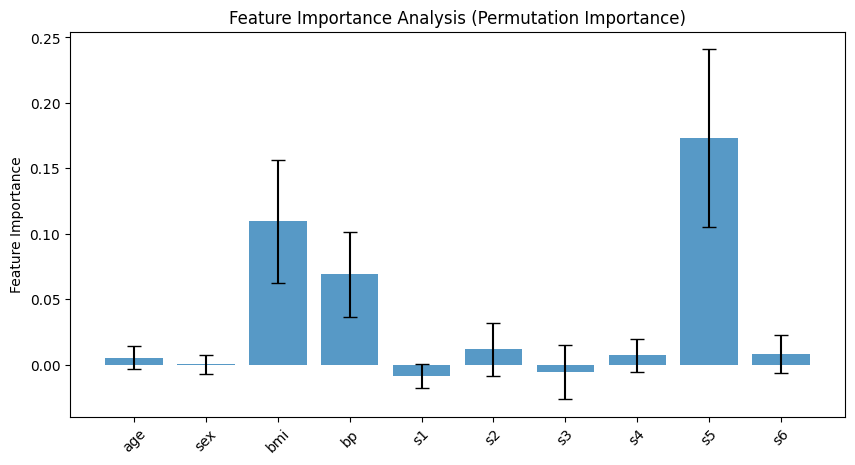

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Regressor
            ######################
            ### Your code here ### 
            ######################
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Compute the feature importance and plot the results
            ######################
            ### Your code here ### 
            ######################
perm_importance = permutation_importance(regressor, X_test, y_test, n_repeats=10, random_state=0)
mean_importances = perm_importance.importances_mean
std_importances = perm_importance.importances_std

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), mean_importances, yerr=std_importances, capsize=5, alpha=0.75)
plt.xticks(ticks=range(X.shape[1]), labels=diabetes.feature_names, rotation=45)
plt.ylabel("Feature Importance")
plt.title("Feature Importance Analysis (Permutation Importance)")
plt.show()




**Answer**
The most important features are clearly s5 followed by bmi and bp. The rest of the features are far less relevant.

# Regression
## Exercise 6

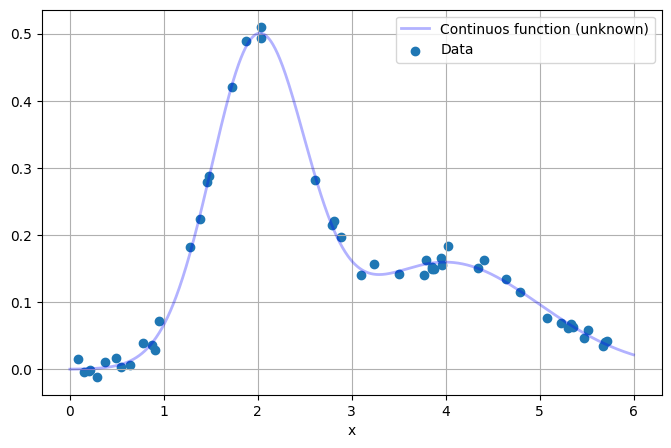

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

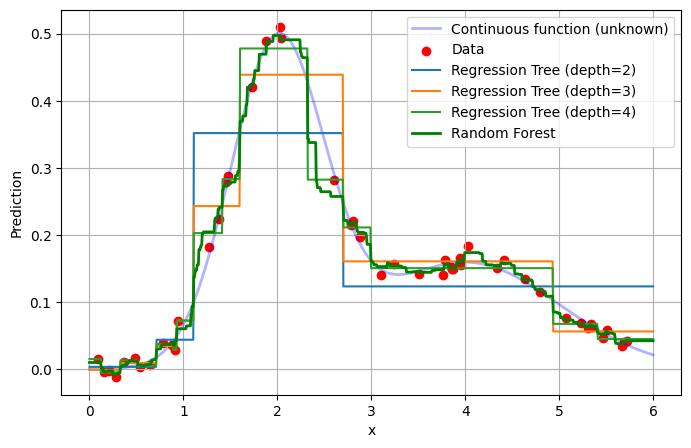

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

            ######################
            ### Your code here ### 
            ######################
# Train regression trees for different depths
depths = [2, 3, 4]
predictions_tree = {}

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, criterion="squared_error")
    tree.fit(Xr.reshape(-1, 1), yr)
    predictions_tree[depth] = tree.predict(x.reshape(-1, 1))

# Train random forest
rf = RandomForestRegressor(n_estimators=100, criterion="squared_error")
rf.fit(Xr.reshape(-1, 1), yr)
predictions_rf = rf.predict(x.reshape(-1, 1))


plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuous function (unknown)", alpha=.3, color="blue", lw=2)
plt.scatter(Xr, yr, label="Data", color="red")
for depth in depths:
    plt.plot(x, predictions_tree[depth], label=f"Regression Tree (depth={depth})")
plt.plot(x, predictions_rf, label="Random Forest", color="green", lw=2)
plt.xlabel("x")
plt.ylabel("Prediction")
plt.legend()
plt.grid(True)
plt.show()

Here the criterion used is "mean-square".

# AdaBoost + stump (bonus question)
## Exercise 7 (+13)

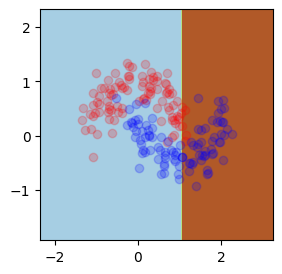

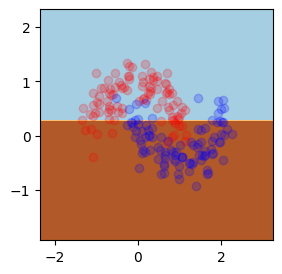

In [40]:
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_bellow_threshold = None
    self.class_above_threshold = None
    self.best_ev = None
  def get_threshold(self): 
      return self.best_threshold
  def get_best(self): 
      return self.best_dimension,  self.best_threshold, self.best_ev
    
  def fit(self,X,y, sample_weight=None): 
    if sample_weight is None: sample_weight = np.ones(len(X))
    #best_ev = None
    best_ev= float('inf')
    region = [X.min(axis=0), X.max(axis=0)]
    for dimension in [0,1]:
      # we evaluate all the possible partitions incrementally
      # at the beggining we assume that all datapoints are in the 'right' partition
      # at the end, they will all in be the 'left' partition
      
      ######################
      ### Your code here ### 
      ######################

      sorted_indices = X[:, dimension].argsort()
      sorted_X = X[sorted_indices]
      sorted_y = y[sorted_indices]
      sorted_weights = sample_weight[sorted_indices]
      
      for i in range(1, len(X)):
        threshold = (sorted_X[i-1, dimension] + sorted_X[i, dimension]) / 2
        
        
        predictions = np.ones_like(sorted_y)
        predictions[sorted_X[:, dimension] < threshold] = -1
        
        #weighted error
        error = np.sum(sorted_weights[predictions != sorted_y])
        
        if error < best_ev:
          best_ev = error
          self.best_dimension = dimension
          self.best_threshold = threshold
          self.class_bellow_threshold = -1 if np.sum(sorted_weights[predictions != sorted_y]) < len(X)/2 else 1
          self.class_above_threshold = 1 if np.sum(sorted_weights[predictions != sorted_y]) < len(X)/2 else -1

    



  def predict(self,X) :
    res = []
    for x in X[:,self.best_dimension]:
      if x < self.best_threshold :
      ######################
      ### Your code here ### 
      ######################
        res.append(self.class_bellow_threshold)
      else:
        res.append(self.class_above_threshold)  
    return np.array(res)


  
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1 # For AdaBoost y={-1,+1} but the rest can be y={0,1} 

#modif w?
w= np.ones(len(y))/len(y)

my_stump = My_stump()
my_stump.fit(X, y, w)
plot_tree(my_stump,X,y)

# Sanity check: my_stump should be the same as the decisionTree of depth=1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
plot_tree(clf,X,y)

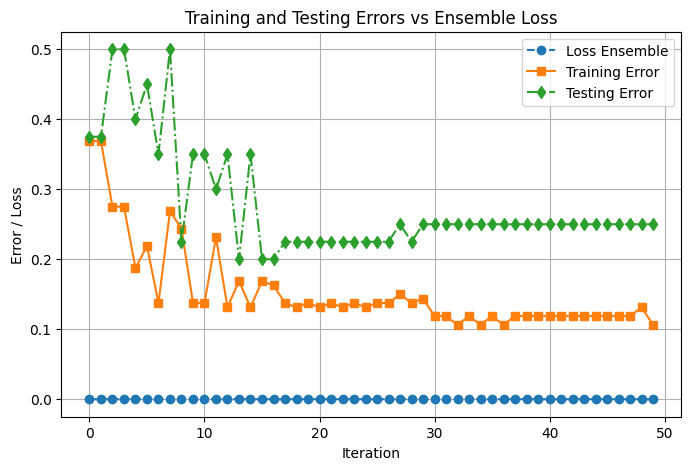

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Function to compute error
def compute_error(y, y_pred, w_m):
    error = np.sum(w_m[y != y_pred]) / np.sum(w_m)  # Normalization
    return error

# Function to compute alpha (classifier weight)
def compute_alpha(error):
    alpha = 0.5 * np.log((1 - error) / error)
    return alpha

# Function to update weights
def update_weights(w_i, alpha, y, y_pred):
    w = w_i * np.exp(-alpha * y * y_pred)
    return w / np.sum(w)  # Normalization of weights

class AdaBoost:
    
    def __init__(self):
        self.alphas = []  # List of classifier coefficients
        self.G_M = []  # List of weak classifiers
        self.M = None  # Number of iterations
        self.training_errors = []  # Training errors
        self.testing_errors = []  # Testing errors
        self.loss_ensemble = []  # Ensemble losses
    
    def predict(self, X):
        weak_p = np.zeros((len(X), self.M))
        for m in range(len(self.G_M)):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_p[:, m] = y_pred_m
        yp = np.sign(np.sum(weak_p, axis=1)).astype(int)
        return yp

    def fit(self, X, y, M=10, X_test=None, y_test=None):
        self.alphas = [] 
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []
        self.M = M

        w_m = np.ones(len(y)) / len(y)  # Uniform initialization of weights

        for m in range(M):
            # Train the weak classifier (stump = depth 1 tree)
            G_m = DecisionTreeClassifier(max_depth=1)
            G_m.fit(X, y, sample_weight=w_m)
            y_pred = G_m.predict(X)

            # Calculate the weighted error
            error_m = compute_error(y, y_pred, w_m)
            
            # Avoid division by zero
            if error_m == 0:
                break

            # Compute the classifier weight
            alpha_m = compute_alpha(error_m)

            # Update the weights
            w_m = update_weights(w_m, alpha_m, y, y_pred)

            # Store the classifier and its coefficient
            self.G_M.append(G_m)
            self.alphas.append(alpha_m)

            # Calculate the training error
            y_train_pred = self.predict(X)
            train_error = np.mean(y_train_pred != y)
            self.training_errors.append(train_error)

            # Calculate the test error
            if X_test is not None and y_test is not None:
                y_test_pred = self.predict(X_test)
                test_error = np.mean(y_test_pred != y_test)
                self.testing_errors.append(test_error)

            # Calculate the ensemble loss
            alphas_array = np.array(self.alphas).reshape(-1, 1)
            loss = np.exp(-np.sum(alphas_array * y_train_pred * y))
            self.loss_ensemble.append(loss)


# Generate a synthetic dataset

dataset = datasets[2]
X = dataset[0]
y = dataset[1]*2-1  # Convert labels to {-1, +1} for AdaBoost

# Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost
ab = AdaBoost()
ab.fit(X_train, y_train, M=50, X_test=X_test, y_test=y_test)

# Display the errors and ensemble loss
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training Error", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing Error", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.title("Training and Testing Errors vs Ensemble Loss")
plt.legend()
plt.grid(True)
plt.show()


# AUC ROC - AUC PR

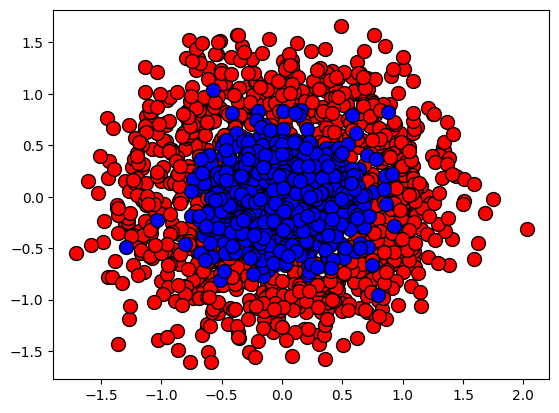

In [46]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ =  roc_curve(y_true, proba[:, 1])          ### Your code here ### 
    roc_auc = auc(fpr, tpr)              ### Your code here ### 
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ = precision_recall_curve(y_true, proba[:, 1])   ### Your code here ### 
    pr_auc =   average_precision_score(y_true, proba[:, 1])              ### Your code here ### 
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled
    


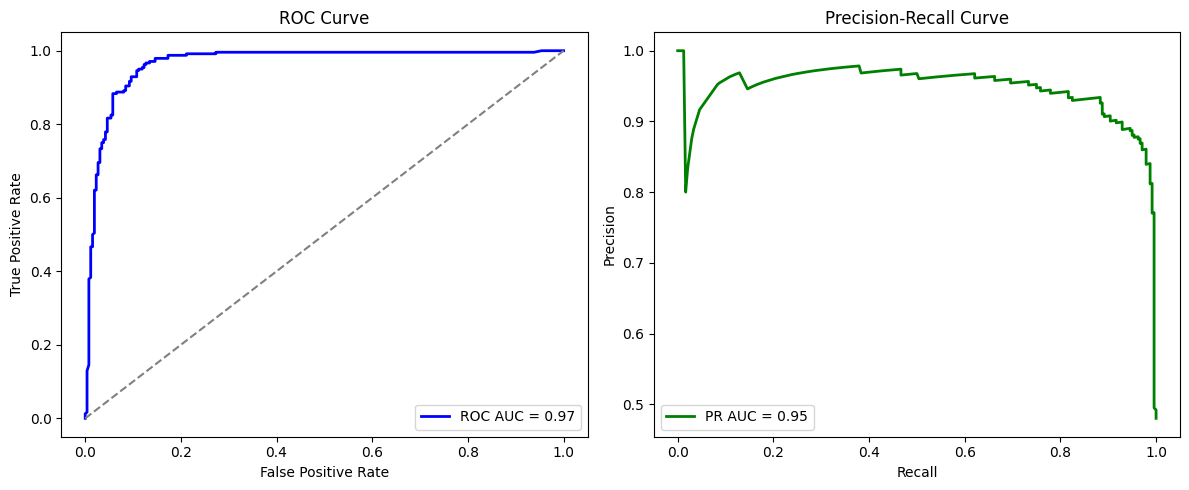

In [48]:

    ######################
    ### Your code here ### 
    ######################
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
cls = RandomForestClassifier(100, max_depth=6)
cls.fit(Xtrain, ytrain)
y_scores = cls.predict_proba(Xtest)
plot_roc_pr(y_scores, ytest)

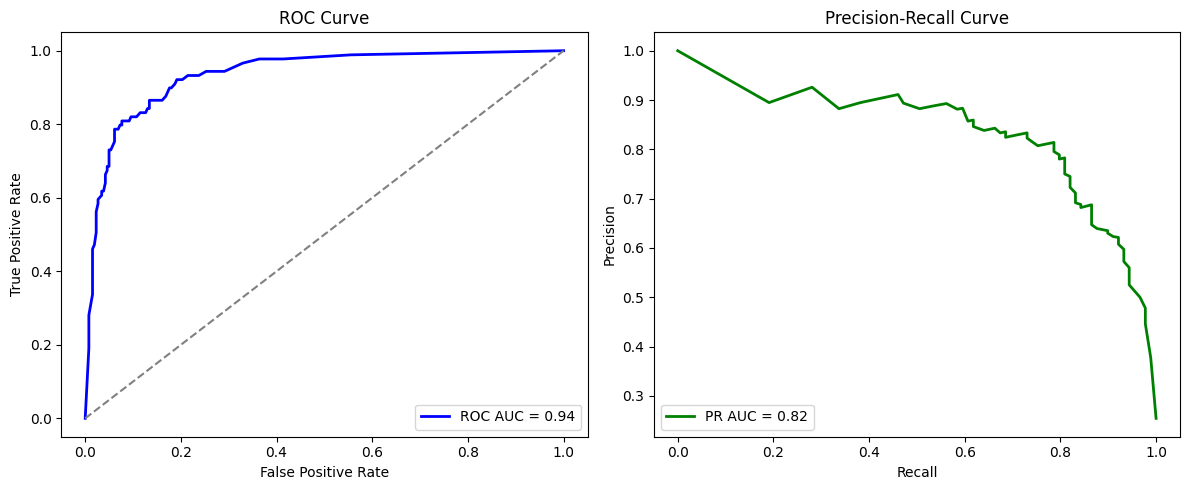

In [49]:
X_subsampled, y_subsampled = subsample_data(X, y, keep_ratio=0.4)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_subsampled, y_subsampled)
cls = RandomForestClassifier(100)
cls.fit(Xtrain, ytrain)
y_scores = cls.predict_proba(Xtest)
plot_roc_pr(y_scores, ytest)

We can see that the False Positive rate increases more rapidly when the dataset is imbalanced and contains a higher proportion of positive data.

**Question 11**

Let's express the:
- Precision
$$\frac{P(\tilde{Y} = 1 | Y=1)}{P(\tilde{Y} = 1 | Y=1) + P(\tilde{Y} = 1 | Y=0)}$$
- Recall
$$\frac{P(\tilde{Y} = 1 | Y=1)}{P(\tilde{Y} = 1 | Y=1) + P(\tilde{Y} = 0 | Y=1)}$$
- False positive rate
$$\frac{P(\tilde{Y} = 1 | Y=0)}{P(\tilde{Y} = 1 | Y=0) + P(\tilde{Y} = 0 | Y=0)}$$
- True prositive rate
$$\frac{P(\tilde{Y} = 1 | Y=1)}{P(\tilde{Y} = 1 | Y=1) + P(\tilde{Y} = 0 | Y=1)}$$

**Question 12**

Let's express the F1-score as the harmonic mean of two of the above quantities (recall and precision):

$$F_1 = \frac{2TP}{2TP + FP + FN}
 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}}$$